In [1]:
import dataset
from embeddings import embeddings, batcher

In [2]:
filename = 'text8.zip'
text = dataset.read_data(filename)

In [53]:
reload(dataset)
data = dataset.Dataset.create_from_text(text,0)

 anarchism originated as a term of abuse first used against early working class radicals including t
[['UNK', -1], ('the', 1061396), ('of', 593677), ('and', 416629), ('one', 411764), ('in', 372201), ('a', 325873), ('to', 316376), ('zero', 264975), ('nine', 250430)]
50000


In [4]:
batch_size = 128
embedding_size = 200 # Dimension of the embedding vector.
skip_window = 1 # How many words to consider left and right.
num_skips = 2 # How many times to reuse an input to generate a label.
num_sampled = 64

In [56]:
batchconfg = batcher.BatcherConfig(batch_size,num_skips, skip_window)

In [57]:
batch = batcher.Batcher(data.text_from_grams, batchconfg)

In [58]:
vocabulary_size = 50000

In [60]:
reload(embeddings)
normalized_embeddings = embeddings.seesion_run(batch,vocabulary_size, embedding_size, num_sampled, 40000, 'Skim Gram', data.id2gram)

Initialzied
Nearest to is: dice, reconciliation, bands, elfin, barbour, pis, stadtholder, platter,
Average loss at step 2000: 4.441102
Average loss at step 4000: 3.941859
Average loss at step 6000: 3.775965
Average loss at step 8000: 3.557243
Average loss at step 10000: 3.650904
Nearest to is: was, are, has, by, be, as, were, in,
Average loss at step 12000: 3.636114
Average loss at step 14000: 3.642015
Average loss at step 16000: 3.614426
Average loss at step 18000: 3.492147
Average loss at step 20000: 3.512196
Nearest to is: was, are, has, were, be, dresser, as, adele,
Average loss at step 22000: 3.555102
Average loss at step 24000: 3.546033
Average loss at step 26000: 3.556547
Average loss at step 28000: 3.512365
Average loss at step 30000: 3.505057
Nearest to is: was, are, has, be, requires, but, does, if,
Average loss at step 32000: 3.324961
Average loss at step 34000: 3.339153
Average loss at step 36000: 3.488937
Average loss at step 38000: 3.470819


In [59]:
reload(embeddings)
m = embeddings.Skim_Gram_Embeddings_test(batch,embedding_size=embedding_size,vocabulary_size=vocabulary_size,num_sampled=num_sampled)
normalized_embeddings = m.Session_graph(30000)

initialized
Average loss at step 2000: 4.402027
Average loss at step 4000: 3.868646
Average loss at step 6000: 3.804988
Average loss at step 8000: 3.689601
Average loss at step 10000: 3.625422
Average loss at step 12000: 3.615606
Average loss at step 14000: 3.584695
Average loss at step 16000: 3.423207
Average loss at step 18000: 3.460443
Average loss at step 20000: 3.541004
Average loss at step 22000: 3.503379
Average loss at step 24000: 3.494966
Average loss at step 26000: 3.482624
Average loss at step 28000: 3.487015


In [31]:
from matplotlib import pylab
from sklearn.manifold import TSNE
num_points = 400

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
two_d_embeddings = tsne.fit_transform(normalized_embeddings[1:num_points+1, :])

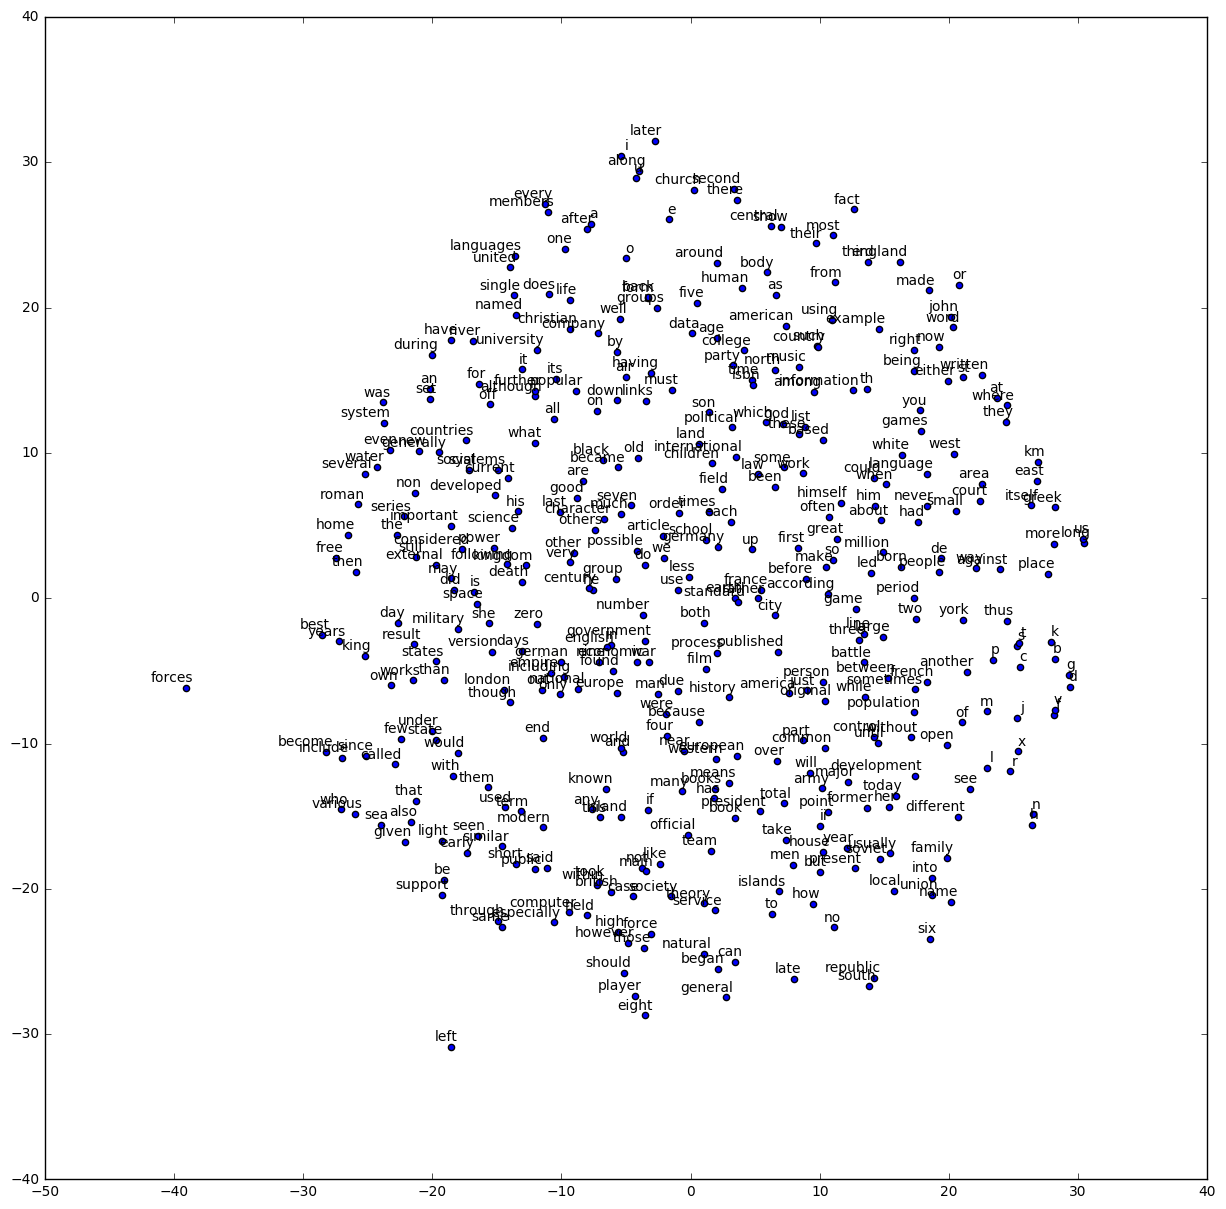

In [16]:
def plot(embeddings, labels):
  assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
  pylab.figure(figsize=(15,15))  # in inches
  for i, label in enumerate(labels):
    x, y = embeddings[i,:]
    pylab.scatter(x, y)
    pylab.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                   ha='right', va='bottom')
  pylab.show()

words = [data.id2gram[i] for i in range(1, num_points+1)]
plot(two_d_embeddings, words)

In [19]:
data.vocabulary_size

50000

In [54]:
words = [data.id2gram[i] for i in data.text_from_grams[0:10]]

In [39]:
print data.id2gram.values()[0:10]

['UNK', 'the', 'of', 'and', 'one', 'in', 'a', 'to', 'zero', 'nine']


In [55]:
print words

['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against']


In [44]:
data.text_from_grams[100:120]

[257,
 112,
 0,
 75,
 72,
 150,
 150,
 112,
 230,
 15,
 0,
 347,
 170,
 0,
 155,
 257,
 112,
 0,
 112,
 157]

In [47]:
data.id2gram[112] in data.id2gram.values()

True

In [48]:
text[0:100]

' anarchism originated as a term of abuse first used against early working class radicals including t'